# 実例を対象とした分類法入門

品種の分からない花のデータに対して、**クラス分類（classification）**または、**教師あり学習（supervised learning）**と呼ばれる手法を使って、品種を予測したい。

## アイリスデータセット

**アイリス**という花に関するデータについて見ていくことにする。このデータセットには3つの品種のアイリスデータで構成されている。サンプルされたアイリスを対象に、次の4つの要素がそれぞれ計測されている。

* がく片の長さ（Sepal length）
* がく片の幅（Sepal width）
* 花弁の長さ（Petal length）
* 花弁の幅（Petal width）

こういったものを**特徴量（features）**と呼ぶこととする。

### 可視化からはじめる

ここで扱うデータは非常に小さいため、すべての点を描画してデータを確認してみる。

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sklearnからload_iris()を用いてデータをロードする

In [2]:
data = load_iris()

In [3]:
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']
labels = target_names[target]

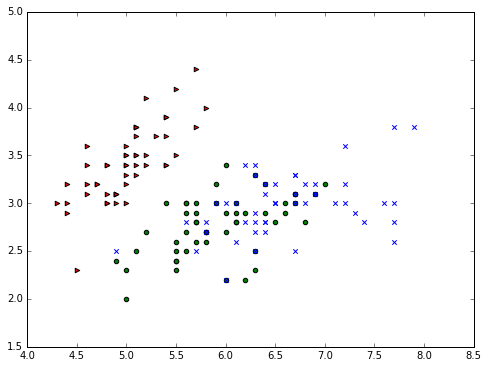

In [4]:
%matplotlib inline

plt.figure(num=None, figsize=(8,6))

for t, marker, c in zip(range(3), ">ox", "rgb"):
    plt.scatter(features[target == t, 0], features[target == t, 1], marker=marker, c=c)

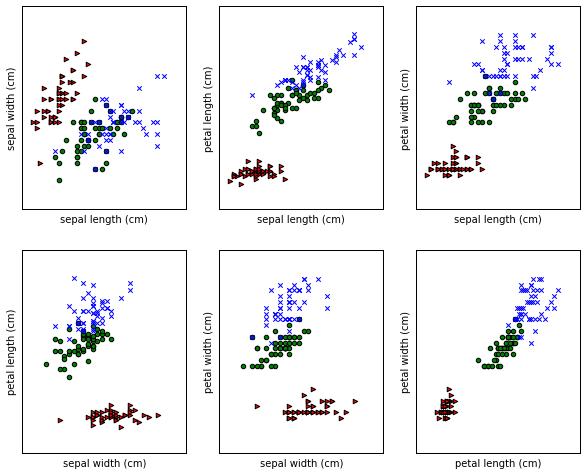

In [5]:
%matplotlib inline

fig,axes = plt.subplots(2, 3, figsize=(10,8))
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Set up 3 different pairs of (color, marker)
color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x'),
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(3):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(features[target == t, p0], features[
                    target == t, p1], marker=marker, c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])

# fig.tight_layout()

### 初めての分類モデル作成

3つの花をグループに分類するのであれば、たとえば「花弁の長さ」を利用することで*Setosa*アイリスを他の品種と見分けることが出来そうである。

In [6]:
plength = features[:,2]
is_setosa = (labels == 'setosa')

max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


*Setosa*の花弁の長さの最大値は1.9であり、他の2品種の花弁の長さの最小値は3.0であることが分かる。

これより、**「もし花弁の長さが2より小さければ、それはSetosaという品種であり、それ以外であれば、それはVirginicaかVersicolorという品種である」**という単純なモデルを作ることができる。

In [7]:
def apply_model(example):
    if example[2] < 2:
        print("Iris Setosa")
    else:
        print("Iris Virginica or Iris Versicolor")

ここでは、一つの次元（特徴量）においてしきい値を定めただけである。*Setosa*を分類することは出来たが、*Virginica*と*Versicolor*についてはどうすれば分類できるだろうか。今、*Setosa*以外の特徴量とラベルを選んでみる。

In [8]:
features = features[~is_setosa]
labels = labels[~is_setosa]
virginica = (labels == 'virginica')

**is_setosa**はブーリアン型の配列であり、これを用いて*Setosa*以外の2品種のアイリスだけからなる配列を生成している。

次にすべての特徴量とその閾値の組み合わせについて、正解率を計算し、正解率の最も高い組み合わせを見つけたい。

In [9]:
best_acc = -1.0
best_fi = -1.0
best_t = -1.0

for fi in range(features.shape[1]):
    # 各種特徴量ごとに閾値の候補を生成する
    thresh = features[:, fi].copy()
    thresh.sort()
    
    # すべての閾値でテストする
    for t in thresh:
        pred = (features[:, fi] > t)
        
        # print(labels[pred] == 'virginica')

        acc = (labels[pred] == 'virginica').mean()
    
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t

`pred`は各サンプルデータがvirginicaであるかどうかを示す予測結果である。この`pred`配列のTrueである要素のラベル名を正解のラベル名であるvirginicaと比較する。ブーリアン型の配列の平均を取ることで、ブーリアン型配列のTrueの割合を求めることができる。これをもって正解率としている。

このモデルを適応するためには次のようにする。

In [10]:
def apply_model(example):
    if example[best_fi] > best_t:
        print("virginica")
    else:
        print("versicolor")

すべてのデータを対象にこの**apply_model()**を定期王すると、最適なモデルは「花弁の幅」について分類するモデルであることが分かる。

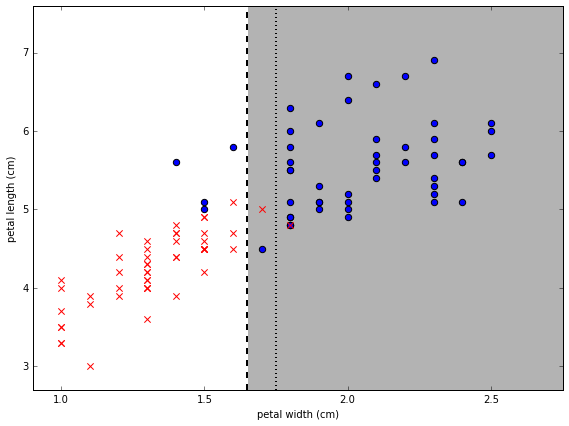

In [11]:
%matplotlib inline

COLOUR_FIGURE = False

is_virginica = (labels == 'virginica')

# Hand fixed thresholds:
t = 1.65
t2 = 1.75

# Features to use: 3 & 2
f0, f1 = 3, 2

if COLOUR_FIGURE:
    area1c = (1., .8, .8)
    area2c = (.8, .8, 1.)
else:
    area1c = (1., 1, 1)
    area2c = (.7, .7, .7)

# Plot from 90% of smallest value to 110% of largest value
# (all feature values are positive, otherwise this would not work very well)

x0 = features[:, f0].min() * .9
x1 = features[:, f0].max() * 1.1

y0 = features[:, f1].min() * .9
y1 = features[:, f1].max() * 1.1

fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)
ax.plot([t, t], [y0, y1], 'k--', lw=2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features[is_virginica, f0],
           features[is_virginica, f1], c='b', marker='o', s=40)
ax.scatter(features[~is_virginica, f0],
           features[~is_virginica, f1], c='r', marker='x', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()

#### 保持データと交差検定で評価を行う

今まで議論してきたモデルを使うと、訓練データの94%を正しく分類することが出来た。しかしながら評価を行うために用いたデータは、閾値を決定するために用いた訓練データと同じであることに注意したい。

ここでは新しい未知なるデータに対して正しく分類できる能力を**汎化能力（generalization ability）**という。ホールドアウトデータを用いて、より正当な評価を行ってみることとする。

In [12]:
from threshold import fit_model, accuracy, predict

labels = data['target_names'][data['target']]

# Split the data in two: testing and training
testing = np.tile([True, False], 50) # testing = [True,False,True,False,True,False...]

# Training is the negation of testing: i.e., datapoints not used for testing,
# will be used for training
training = ~testing

model = fit_model(features[training], is_virginica[training])
train_accuracy = accuracy(features[training], is_virginica[training], model)
test_accuracy = accuracy(features[testing], is_virginica[testing], model)

print('''\
Training accuracy was {0:.1%}.
Testing accuracy was {1:.1%} (N = {2}).
'''.format(train_accuracy, test_accuracy, testing.sum()))

Training accuracy was 96.0%.
Testing accuracy was 90.0% (N = 50).



結果を見ると、テストデータを用いて評価を行った場合胃のほうが、訓練データを用いた場合よりも正解率が低くなっていることがわかる。これは前のプロット図において、決定境界付近のデータをテストデータとした場合、誤ったクラスに分類されてしまっている場合があるからだと考えられる。

これまでは訓練データの中から一部データを取り除き、その取り除いたデータを評価用データとして利用した。今回は**交差検定（cross-validation）**という手法を用いて、すべてのデータを訓練に使い、すべてのデータをテストに使ってみたい。

ここで交差検定の極端な例として、データを一つ省き、それ以外のデータでモデルの学習を行こなう**leave-one-out法**を使って交差検定をしてみる。

In [13]:
correct = 0.0

for ei in range(len(features)):
    # select all but the one at position `ei`:
    training = np.ones(len(features), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features[training], is_virginica[training])
    predict(model, features[testing])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions == is_virginica[testing])
acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%


forループの最後で、すべてのデータを対象としてモデルを評価している。

leave-one-out法はデータが増えるに従って処理時間が増加してしまう。ここでは**K-分割交差検定（K-fold Cross Validation）**という手法を用いてることで、leave-one-out法の処理コストを減らすことができる。

K=5のときの5分割交差検定を行うとすると、以下のような流れに従うことになる。

1. データセットを5つのブロックに分割する
2. 1つのブロックを除いたデータ集合を訓練データ、除いたブロックをテスト用データとして学習と評価を行う
3. 同じことを各ブロックを対象に、全5回行う

各回で算出した誤差を平均して最終結果を出す。

## さらに複雑なクラス分類器の作成

クラス分類モデルを構成している要素として、次の3つに分けることができる。

* モデル構造
* 探索アルゴリズム
* 損失関数

損失関数を用いることで、より**悪くない**モデルを選択することができる。

## より複雑なデータセットとクラス分類

先の例よりも少しだけ複雑なデータセットを扱う。そういった複雑さに対応するため、新しい分類アルゴリズムを導入してみる。

### 種データセットを学習する

今回は小麦の種に関する計測データを利用して3つの品種の小麦を分類したい。データセットにはカナダ産、コマ産、ロサ産の品種と、次の7つの特徴量が計測されている。

* 面積($A$)
* 周囲の長さ($P$)
* 密集度($C=4 \pi A/P^2$)
* 長さ
* 幅
* 非対称計数
* 殻溝の長さ

### 特徴量と特徴エンジニアリング

小麦のデータセットの中に「密集度」というものがある。これは「面積」と「周囲の長さ」から計算でき、一般的に**特徴エンジニアリング（feature engineering）**と呼ばれている。機械学習においては、アルゴリズムに重きをおいてしまう場合が多いが、システム性能に大きな影響を及ぼすのは、特徴エンジニアリングの方である。

小麦のデータの「密集度」特徴というものは、同じ形状の小麦で起きさが2倍違っても同じ値になる。しかしながら細長いコム日の場合は密集度が0に近づき、一方で丸みのある小麦の場合は密集度が1に近づくものである。

「密集度」特徴は、小麦全体の大きさが変わっても密集度は変わらないが、形状が変わると密集度が変化することを示しているもので、これは「良い特徴量」と言える。一般的に良い特徴量となるには、2つの条件を同時に満たす必要がある。

* 重要なことには敏感に反応すること
* 重要でないことには反応を示さないこと

実際こういった条件を満たす特徴量を求めるのは難しい。

「最適な特徴量を自動で選び出すことが出来ないか」という考えに至るが、これは**特徴選択（fature selection）**という問題として知られている。多くの手法が存在しているが、実際の問題においては単純な手法が一番上手くいくことが多いようである。

### 最近傍法

ここでは新しい分類手法として**最近傍法（Nearest neighbor classification）**を学ぶ。

各データが特徴ベクトルに酔って表現されていると考えると、データ間の距離を以下のように計算することができる。ここでは二次元のベクトル$(x_0, y_0)$と$(x_1, y_1)$の距離$d$を考えてみると、

$$
    d = \sqrt{(x_0-x_1)^2+(y_0 - y_1)^2}
$$

であり、実装は以下のようになる。

In [14]:
def distance(p0, p1):
    """
    ユークリッド距離を計算する
    """
    return np.sum((p0 - p1)**2)

ここで、新しいデータが与えられた場合、そのデータに最も近い点（最近傍点）をデータセットから探索し、その最近傍点のラベルを結果とする。

In [15]:
def nn_classify(training_set, training_labels, new_example):
    dists = np.array([distance(t, new_example) for t in training_set])
    nearest = dists.argmin()
    return training_labels[nearest]

ここで使用するモデルは訓練ｄねーたとそのラベルをすべて保持する。その後新しいデータが入力された時、すなわち**分類時**にすべての計算を行う。

scikit-learnライブラリのNearest neighbor classificationを利用して分類を行ってみることにする。

In [16]:
COLOUR_FIGURE = False

from matplotlib.colors import ListedColormap
from load import load_dataset
from sklearn.neighbors import KNeighborsClassifier

feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficien',
    'length of kernel groove',
]


def plot_decision(features, labels, num_neighbors=1):
    '''Plots decision boundary for KNN
    Parameters
    ----------
    features : ndarray
    labels : sequence
    Returns
    -------
    fig : Matplotlib Figure
    ax  : Matplotlib Axes
    '''
    y0, y1 = features[:, 2].min() * .9, features[:, 2].max() * 1.1
    x0, x1 = features[:, 0].min() * .9, features[:, 0].max() * 1.1
    X = np.linspace(x0, x1, 1000)
    Y = np.linspace(y0, y1, 1000)
    X, Y = np.meshgrid(X, Y)

    model = KNeighborsClassifier(num_neighbors)
    model.fit(features[:, (0,2)], labels)

    C = model.predict(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)

    if COLOUR_FIGURE:
        cmap = ListedColormap([(1., .7, .7), (.7, 1., .7), (.7, .7, 1.)])
    else:
        cmap = ListedColormap([(1., 1., 1.), (.2, .2, .2), (.6, .6, .6)])
    
    fig,ax = plt.subplots(figsize=(8,6))
    # fig.legend((0,1,2), ('Cana', 'Kama', 'Rosa'),loc="upper left")
    # ax.legend(loc="upper left")
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[2])
    ax.pcolormesh(X, Y, C, cmap=cmap)
    if COLOUR_FIGURE:
        cmap = ListedColormap([(1., .0, .0), (.1, .6, .1), (.0, .0, 1.)])
        ax.scatter(features[:, 0], features[:, 2], c=labels, cmap=cmap)
    else:
        for lab, ma in zip(range(3), "Do^"):
            ax.plot(features[labels == lab, 0], features[
                     labels == lab, 2], ma, c=(1., 1., 1.), ms=6)
    return fig,ax


features, labels = load_dataset('seeds')
names = sorted(set(labels))
labels = np.array([names.index(ell) for ell in labels])

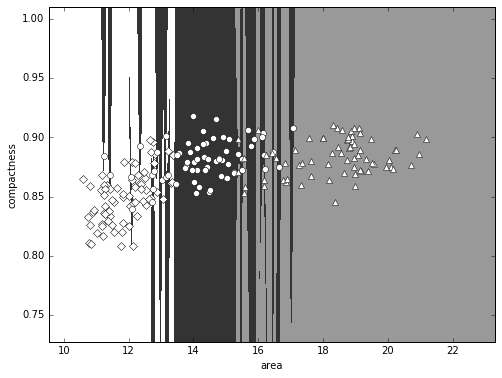

In [17]:
fig,ax = plot_decision(features, labels)
# fig.legend(["%s" % label for label in labels], loc="upper left")
# ax.legend(loc="upper left")
# fig.tight_layout()

カナダ産小麦がひし形、コマ産が円形、ロサ産が三角形でプロットされている。また各クラスが属する領域がそれぞれ白、黒、グレーに対応している。それぞれの軸を共通のスケールにするため、正規化（normalize）する必要があるが、今回はZスコアを用いて正規化を行った。

Zスコアとは、ある値$x_i$が平均$\bar{x}$からどれだけ離れているかということについて、以下のように標準偏差$SD$を基準として求めることができる。

$$
    Z = \frac{x_i - \bar{x}}{SD}
$$

In [18]:
features -= features.mean(0)
features /= features.std(0)

Zスコアを算出することによって、その値本来の意味とは独立して考えることができる。特徴量に対して正規化を行った時のグラフを以下に示す。

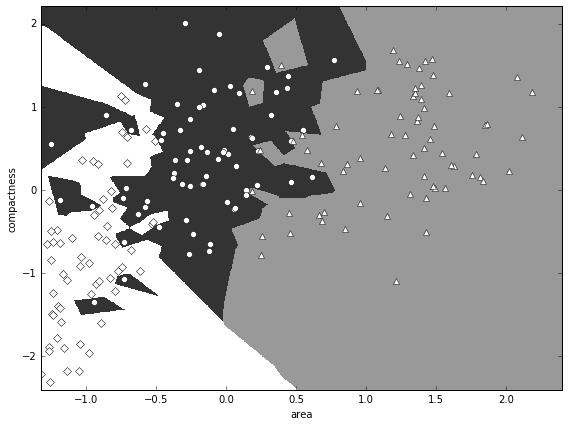

In [ ]:
fig, ax = plot_decision(features, labels)
fig.tight_layout()

今度は境界部分がより複雑になっていることが見て取れる。正規化を行うことで、それぞれの特徴量の「重要性」を均一にすることができる。逆に正規化を行わなければ、特定の特徴量だけに結果を左右させてしまうことになる。

なお、最近傍法をより一般化したk近傍法（k-nearest neighbor classfier）という手法がある。ここではk=11とし、11個の近傍点を対象としたグラフを示す。

In [ ]:
fig,ax = plot_decision(features, labels, 11)
fig.tight_layout()

## 二項分類と多項分類

今回はじめの分類器は、閾値に酔って分類を行う単純な分類器であった。これはデータの値が閾値より大きいかどうかによって、あるクラスに属するか、それ以外なのかを分類した。これは**二項分類（binary classification）**と呼ばれている。また、最近傍法を利用した分類器は、複数のクラスの中からどれか一つを結果として出力している。これは**多項分類（multiclass classification）**と呼ばれている。多項分類を行う場合でも、二項分類からなる問題に帰着することができる。